# Tarea 3

Michael Encalada

### Cargar base de datos

In [16]:
# reading in
import pandas as pd
LinkToData="https://docs.google.com/spreadsheets/d/e/2PACX-1vQrhUIeuqKnPOUget-6T2AfZkf4NhTggn1LRI6_MZ5t1IUP3kIXtRdYMFHiOj873Q/pub?gid=1051753554&single=true&output=csv"
FigueData = pd.read_csv(LinkToData,
                          index_col=0) #notice!!!!!

In [17]:
FigueData.head()

,Acuña_Peralta_María_Grimaneza,Acuña_Peralta_Segundo_Héctor,Agüero_Gutiérrez_María_Antonieta,Aguinaga_Recuenco_Alejandro_Aurelio,Alcarraz_Aguero_Yorel_Kira,Alva_Prieto_María_del_Carmen,Alva_Rojas_Carlos_Enrique,Amuruz_Dulanto_Yessica_Rosselli,Anderson_Ramírez_Carlos_Antonio,Aragón_Carreño_Luis_Ángel,...,Ventura_Angel_Héctor_José,Vergara_Mendoza_Elvis_Hernán,Williams_Zapata_José_Daniel,Yarrow_Lumbreras_Norma_Martina,Zea_Choquechambi_Oscar,Zeballos_Aponte_Jorge_Arturo,Zeballos_Madariaga_Carlos_Javier,Zeta_Chunga_Cruz_María,PP,party
names,,,,,,,,,,,,,,,,,,,,,
Acuña_Peralta_María_Grimaneza,1,0,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,ALIANZA PARA EL PROGRESO
Acuña_Peralta_Segundo_Héctor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,HONOR Y DEMOCRACIA
Agüero_Gutiérrez_María_Antonieta,1,0,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,PERÚ LIBRE
Aguinaga_Recuenco_Alejandro_Aurelio,1,0,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,FUERZA POPULAR
Alcarraz_Aguero_Yorel_Kira,1,0,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,1,1,PODEMOS PERÚ


In [18]:
FigueData.columns

Index(['Acuña_Peralta_María_Grimaneza', 'Acuña_Peralta_Segundo_Héctor',
       'Agüero_Gutiérrez_María_Antonieta',
       'Aguinaga_Recuenco_Alejandro_Aurelio', 'Alcarraz_Aguero_Yorel_Kira',
       'Alva_Prieto_María_del_Carmen', 'Alva_Rojas_Carlos_Enrique',
       'Amuruz_Dulanto_Yessica_Rosselli', 'Anderson_Ramírez_Carlos_Antonio',
       'Aragón_Carreño_Luis_Ángel',
       ...
       'Ventura_Angel_Héctor_José', 'Vergara_Mendoza_Elvis_Hernán',
       'Williams_Zapata_José_Daniel', 'Yarrow_Lumbreras_Norma_Martina',
       'Zea_Choquechambi_Oscar', 'Zeballos_Aponte_Jorge_Arturo',
       'Zeballos_Madariaga_Carlos_Javier', 'Zeta_Chunga_Cruz_María', 'PP',
       'party'],
      dtype='object', length=131)

The adjacency matrix 

In [19]:
import networkx as nx
EliteNet = nx.from_pandas_adjacency(FigueData)

### Elite Net

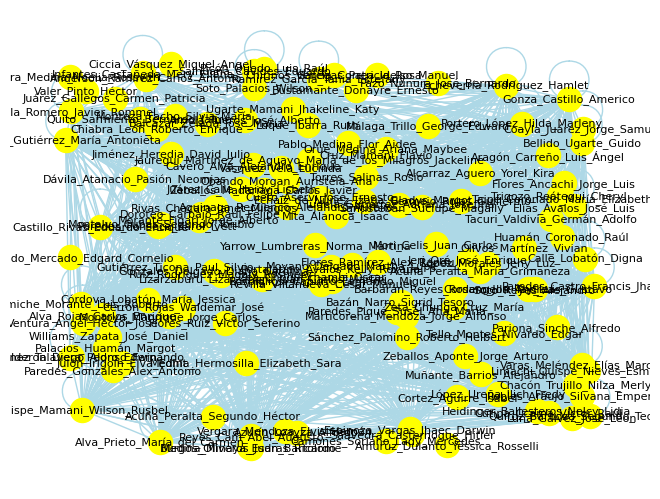

In [21]:
# plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

In [22]:
EliteNet.remove_edges_from(nx.selfloop_edges(EliteNet))

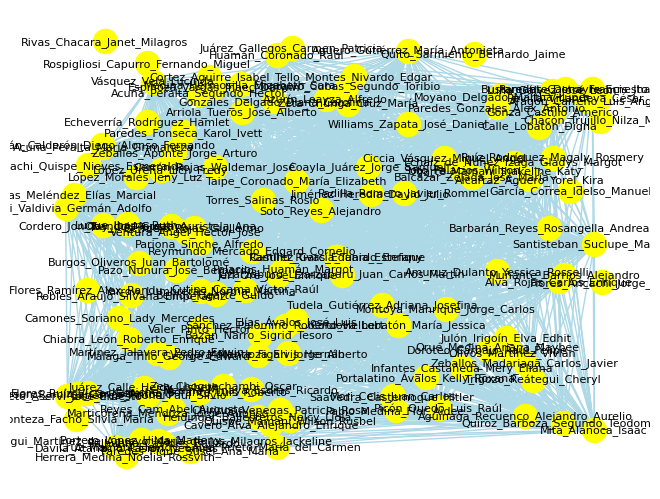

In [23]:
# re plot
nx.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

### Filtrar por partidos

In [26]:
# Asegúrate de que los índices del DataFrame coincidan con los nodos del grafo
attributeToAdd = dict(zip(FigueData.index, FigueData['party']))

# Asigna los atributos al grafo (nodos)
nx.set_node_attributes(EliteNet, attributeToAdd, 'party')



In [33]:
# Lista de partidos que deseas filtrar
partidos = ['ALIANZA PARA EL PROGRESO', 'PERÚ LIBRE', 'FUERZA POPULAR', 'PODEMOS PERÚ']

# Filtrar los nodos cuyos atributos 'party' están en la lista de partidos
nodos_filtrados = [n for n, attr in EliteNet.nodes(data=True) if attr.get('party') in partidos]

# Crear un subgrafo con los nodos filtrados
subgrafo = EliteNet.subgraph(nodos_filtrados)

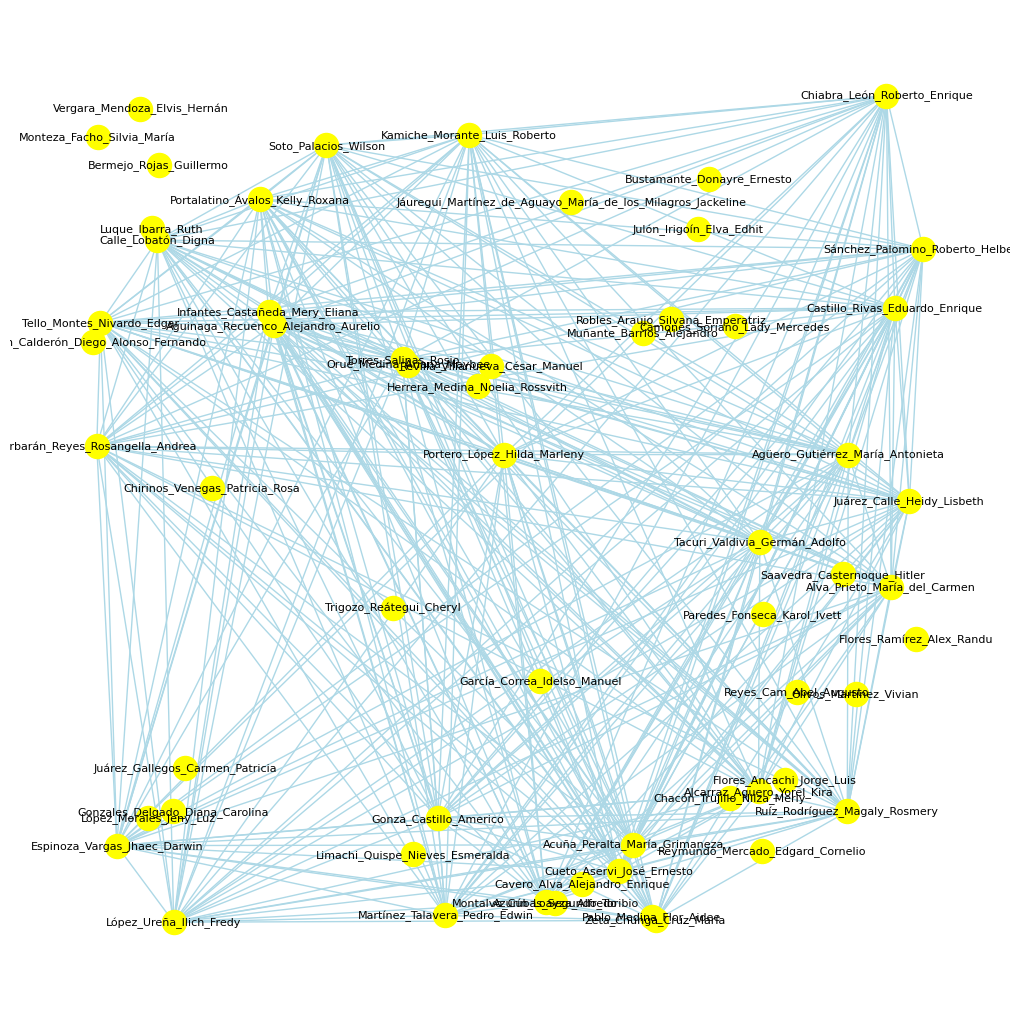

In [34]:
import matplotlib.pyplot as plt
import networkx as nx

# Configura el tamaño del gráfico
plt.figure(figsize=(10, 10))

# Dibuja el subgrafo con los nodos filtrados
nx.draw_random(subgrafo,
               node_color='yellow',
               edge_color='lightblue',
               with_labels=True,
               font_size=8)

# Mostrar el gráfico
plt.show()

## Podemos

In [40]:
# Lista de partidos que deseas filtrar
partido_podemos = ['PODEMOS PERÚ']

# Filtrar los nodos cuyos atributos 'party' están en la lista de partidos
nodos_filtr = [n for n, attr in EliteNet.nodes(data=True) if attr.get('party') in partido_podemos]

# Crear un subgrafo con los nodos filtrados
podemos = EliteNet.subgraph(nodos_filtr)

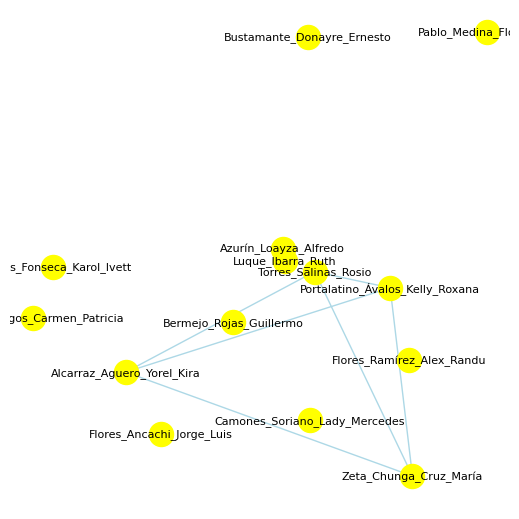

In [42]:
import matplotlib.pyplot as plt
import networkx as nx

# Configura el tamaño del gráfico
plt.figure(figsize=(5, 5))

# Dibuja el subgrafo con los nodos filtrados
nx.draw_random(podemos,
               node_color='yellow',
               edge_color='lightblue',
               with_labels=True,
               font_size=8)

# Mostrar el gráfico
plt.show()

### Votos en contra

In [45]:
# Lista de partidos que deseas filtrar
partidos_contra = ['RENOVACIÓN POPULAR', 'BANCADA SOCIALISTA', 'BLOQUE DEMOCRÁTICO POPULAR', 'SOMOS PERÚ', 'AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL']

# Filtrar los nodos cuyos atributos 'party' están en la lista de partidos
nod_f = [n for n, attr in EliteNet.nodes(data=True) if attr.get('party') in partidos_contra]

# Crear un subgrafo con los nodos filtrados
contras = EliteNet.subgraph(nod_f)

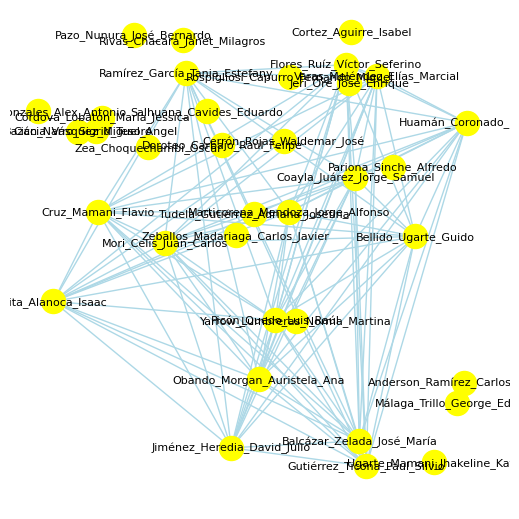

In [46]:
import matplotlib.pyplot as plt
import networkx as nx

# Configura el tamaño del gráfico
plt.figure(figsize=(10, 10))

# Dibuja el subgrafo con los nodos filtrados
nx.draw_random(contras,
               node_color='yellow',
               edge_color='lightblue',
               with_labels=True,
               font_size=8)

# Mostrar el gráfico
plt.show()

### Atributos

In [ ]:
dict(zip(FigueData.index,FigueData['Multinacional']))

In [ ]:
attributeToAdd=dict(zip(FigueData.index,FigueData['Multinacional']))
nx.set_node_attributes(EliteNet, attributeToAdd,'multi')

In [ ]:
colors={e:'red' if v==1 else 'green' for e,v in nx.get_node_attributes(EliteNet,"multi").items()}
nx.set_node_attributes(EliteNet, colors, "color")
nx.draw_random(EliteNet,node_color=nx.get_node_attributes(EliteNet, "color").values())

### Exploración

In [29]:
# type of network
type(EliteNet)

networkx.classes.graph.Graph

In [30]:
# nodes , #edges
len(EliteNet.nodes),len(EliteNet.edges)

(129, 2080)

In [31]:
# is connected
nx.is_connected(EliteNet)

False

In [32]:
# how many CC?
len(list(nx.connected_components(EliteNet)))

65

In [33]:
# how many in each?
[len(c) for c in sorted(nx.connected_components(EliteNet), key=len, reverse=True)]

[65,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [34]:
# any isolates?
list(nx.isolates(EliteNet))

['Acuña_Peralta_Segundo_Héctor',
 'Amuruz_Dulanto_Yessica_Rosselli',
 'Anderson_Ramírez_Carlos_Antonio',
 'Aragón_Carreño_Luis_Ángel',
 'Azurín_Loayza_Alfredo',
 'Bazán_Calderón_Diego_Alonso_Fernando',
 'Bazán_Narro_Sigrid_Tesoro',
 'Bermejo_Rojas_Guillermo',
 'Bustamante_Donayre_Ernesto',
 'Camones_Soriano_Lady_Mercedes',
 'Cavero_Alva_Alejandro_Enrique',
 'Cerrón_Rojas_Waldemar_José',
 'Chacón_Trujillo_Nilza_Merly',
 'Chirinos_Venegas_Patricia_Rosa',
 'Ciccia_Vásquez_Miguel_Angel',
 'Córdova_Lobatón_María_Jessica',
 'Cortez_Aguirre_Isabel',
 'Dávila_Atanacio_Pasión_Neomias',
 'Doroteo_Carbajo_Raúl_Felipe',
 'Echaíz_de_Núñez_Izaga_Gladys_Margot',
 'Flores_Ancachi_Jorge_Luis',
 'Flores_Ramírez_Alex_Randu',
 'García_Correa_Idelso_Manuel',
 'Gonzales_Delgado_Diana_Carolina',
 'Herrera_Medina_Noelia_Rossvith',
 'Jáuregui_Martínez_de_Aguayo_María_de_los_Milagros_Jackeline',
 'Jeri_Oré_José_Enrique',
 'Juárez_Gallegos_Carmen_Patricia',
 'Julón_Irigoín_Elva_Edhit',
 'Limachi_Quispe_Nieves_Es

In [35]:
#just for the largest component
largest_cc_nodes = max(nx.connected_components(EliteNet), key=len)
EliteNet_largest=EliteNet.subgraph(largest_cc_nodes)

nx.diameter(EliteNet_largest)

1

In [36]:
# geodesics 
geodesics = dict(nx.all_pairs_shortest_path_length(EliteNet))

# as matrix
MatrixGeo = [[geodesics.get(n,{}).get(m)  for m in EliteNet.nodes] for n in EliteNet.nodes]

# as DF (pandas)
MatrixGeo_DF=pd.DataFrame(MatrixGeo,index=EliteNet.nodes, columns=EliteNet.nodes)

# we get
MatrixGeo_DF

,Acuña_Peralta_María_Grimaneza,Acuña_Peralta_Segundo_Héctor,Agüero_Gutiérrez_María_Antonieta,Aguinaga_Recuenco_Alejandro_Aurelio,Alcarraz_Aguero_Yorel_Kira,Alva_Prieto_María_del_Carmen,Alva_Rojas_Carlos_Enrique,Amuruz_Dulanto_Yessica_Rosselli,Anderson_Ramírez_Carlos_Antonio,Aragón_Carreño_Luis_Ángel,...,Varas_Meléndez_Elías_Marcial,Vásquez_Vela_Lucinda,Ventura_Angel_Héctor_José,Vergara_Mendoza_Elvis_Hernán,Williams_Zapata_José_Daniel,Yarrow_Lumbreras_Norma_Martina,Zea_Choquechambi_Oscar,Zeballos_Aponte_Jorge_Arturo,Zeballos_Madariaga_Carlos_Javier,Zeta_Chunga_Cruz_María
Acuña_Peralta_María_Grimaneza,0.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Acuña_Peralta_Segundo_Héctor,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agüero_Gutiérrez_María_Antonieta,1.0,NaN,0.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Aguinaga_Recuenco_Alejandro_Aurelio,1.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Alcarraz_Aguero_Yorel_Kira,1.0,NaN,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yarrow_Lumbreras_Norma_Martina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Zea_Choquechambi_Oscar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
Zeballos_Aponte_Jorge_Arturo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Zeballos_Madariaga_Carlos_Javier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [37]:
# a frequency table of the geodesics
import numpy as np

pd.DataFrame(np.unique(MatrixGeo_DF.values, return_counts=True),index=['valor','freq']).T.set_index('valor')

,freq
valor,
0.0,129.0
1.0,4160.0
NaN,12352.0


In [39]:
MatrixReach_DF=(MatrixGeo_DF>0).replace({True:1,False:0})
MatrixReach_DF

,Acuña_Peralta_María_Grimaneza,Acuña_Peralta_Segundo_Héctor,Agüero_Gutiérrez_María_Antonieta,Aguinaga_Recuenco_Alejandro_Aurelio,Alcarraz_Aguero_Yorel_Kira,Alva_Prieto_María_del_Carmen,Alva_Rojas_Carlos_Enrique,Amuruz_Dulanto_Yessica_Rosselli,Anderson_Ramírez_Carlos_Antonio,Aragón_Carreño_Luis_Ángel,...,Varas_Meléndez_Elías_Marcial,Vásquez_Vela_Lucinda,Ventura_Angel_Héctor_José,Vergara_Mendoza_Elvis_Hernán,Williams_Zapata_José_Daniel,Yarrow_Lumbreras_Norma_Martina,Zea_Choquechambi_Oscar,Zeballos_Aponte_Jorge_Arturo,Zeballos_Madariaga_Carlos_Javier,Zeta_Chunga_Cruz_María
Acuña_Peralta_María_Grimaneza,0,0,1,1,1,1,1,0,0,0,...,1,1,1,0,0,0,0,0,0,1
Acuña_Peralta_Segundo_Héctor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Agüero_Gutiérrez_María_Antonieta,1,0,0,1,1,1,1,0,0,0,...,1,1,1,0,0,0,0,0,0,1
Aguinaga_Recuenco_Alejandro_Aurelio,1,0,1,0,1,1,1,0,0,0,...,1,1,1,0,0,0,0,0,0,1
Alcarraz_Aguero_Yorel_Kira,1,0,1,1,0,1,1,0,0,0,...,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yarrow_Lumbreras_Norma_Martina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zea_Choquechambi_Oscar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zeballos_Aponte_Jorge_Arturo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zeballos_Madariaga_Carlos_Javier,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# connectedness
nNodes=len(EliteNet.nodes)
MatrixReach_DF.sum().sum()/(nNodes*(nNodes-1))

0.25193798449612403

In [41]:
# geodesics 
geodesics_Lcc = dict(nx.all_pairs_shortest_path_length(EliteNet_largest))

# as matrix
MatrixGeo_Lcc = [[geodesics_Lcc.get(n,{}).get(m)  for m in EliteNet_largest.nodes] for n in EliteNet_largest.nodes]

# as DF (pandas)
MatrixGeo_DF_Lcc=pd.DataFrame(MatrixGeo_Lcc,index=EliteNet_largest.nodes, columns=EliteNet_largest.nodes)

# we get
MatrixGeo_DF_Lcc

,Acuña_Peralta_María_Grimaneza,Agüero_Gutiérrez_María_Antonieta,Aguinaga_Recuenco_Alejandro_Aurelio,Alcarraz_Aguero_Yorel_Kira,Alva_Prieto_María_del_Carmen,Alva_Rojas_Carlos_Enrique,Arriola_Tueros_José_Alberto,Balcázar_Zelada_José_María,Barbarán_Reyes_Rosangella_Andrea,Bellido_Ugarte_Guido,...,Soto_Palacios_Wilson,Soto_Reyes_Alejandro,Tacuri_Valdivia_Germán_Adolfo,Taipe_Coronado_María_Elizabeth,Tello_Montes_Nivardo_Edgar,Torres_Salinas_Rosio,Varas_Meléndez_Elías_Marcial,Vásquez_Vela_Lucinda,Ventura_Angel_Héctor_José,Zeta_Chunga_Cruz_María
Acuña_Peralta_María_Grimaneza,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Agüero_Gutiérrez_María_Antonieta,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Aguinaga_Recuenco_Alejandro_Aurelio,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Alcarraz_Aguero_Yorel_Kira,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Alva_Prieto_María_del_Carmen,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Torres_Salinas_Rosio,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Varas_Meléndez_Elías_Marcial,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
Vásquez_Vela_Lucinda,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
Ventura_Angel_Héctor_José,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [42]:
# reachability
MatrixReach_DF_Lcc=(MatrixGeo_DF_Lcc>0).replace({True:1,False:0})
MatrixReach_DF_Lcc

,Acuña_Peralta_María_Grimaneza,Agüero_Gutiérrez_María_Antonieta,Aguinaga_Recuenco_Alejandro_Aurelio,Alcarraz_Aguero_Yorel_Kira,Alva_Prieto_María_del_Carmen,Alva_Rojas_Carlos_Enrique,Arriola_Tueros_José_Alberto,Balcázar_Zelada_José_María,Barbarán_Reyes_Rosangella_Andrea,Bellido_Ugarte_Guido,...,Soto_Palacios_Wilson,Soto_Reyes_Alejandro,Tacuri_Valdivia_Germán_Adolfo,Taipe_Coronado_María_Elizabeth,Tello_Montes_Nivardo_Edgar,Torres_Salinas_Rosio,Varas_Meléndez_Elías_Marcial,Vásquez_Vela_Lucinda,Ventura_Angel_Héctor_José,Zeta_Chunga_Cruz_María
Acuña_Peralta_María_Grimaneza,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Agüero_Gutiérrez_María_Antonieta,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Aguinaga_Recuenco_Alejandro_Aurelio,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Alcarraz_Aguero_Yorel_Kira,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Alva_Prieto_María_del_Carmen,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Torres_Salinas_Rosio,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Varas_Meléndez_Elías_Marcial,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
Vásquez_Vela_Lucinda,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
Ventura_Angel_Héctor_José,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [43]:
# connectedness
nNodes=len(EliteNet_largest.nodes)
MatrixReach_DF_Lcc.sum().sum()/(nNodes*(nNodes-1))

1.0

In [44]:
# for our case:
nx.density(EliteNet_largest)

1.0

In [45]:
actorMeasures=pd.concat([pd.DataFrame.from_dict(nx.degree_centrality(EliteNet_largest),
                                  orient='index',
                                  columns=['Degree']),
           pd.DataFrame.from_dict(nx.closeness_centrality(EliteNet_largest),
                                  orient='index',
                                  columns=['Closeness']),
           pd.DataFrame.from_dict(nx.betweenness_centrality(EliteNet_largest),
                                  orient='index',
                                  columns=['Betweenness'])],axis=1)
## data
actorMeasures

,Degree,Closeness,Betweenness
Acuña_Peralta_María_Grimaneza,1.0,1.0,0.0
Agüero_Gutiérrez_María_Antonieta,1.0,1.0,0.0
Aguinaga_Recuenco_Alejandro_Aurelio,1.0,1.0,0.0
Alcarraz_Aguero_Yorel_Kira,1.0,1.0,0.0
Alva_Prieto_María_del_Carmen,1.0,1.0,0.0
...,...,...,...
Torres_Salinas_Rosio,1.0,1.0,0.0
Varas_Meléndez_Elías_Marcial,1.0,1.0,0.0
Vásquez_Vela_Lucinda,1.0,1.0,0.0
Ventura_Angel_Héctor_José,1.0,1.0,0.0


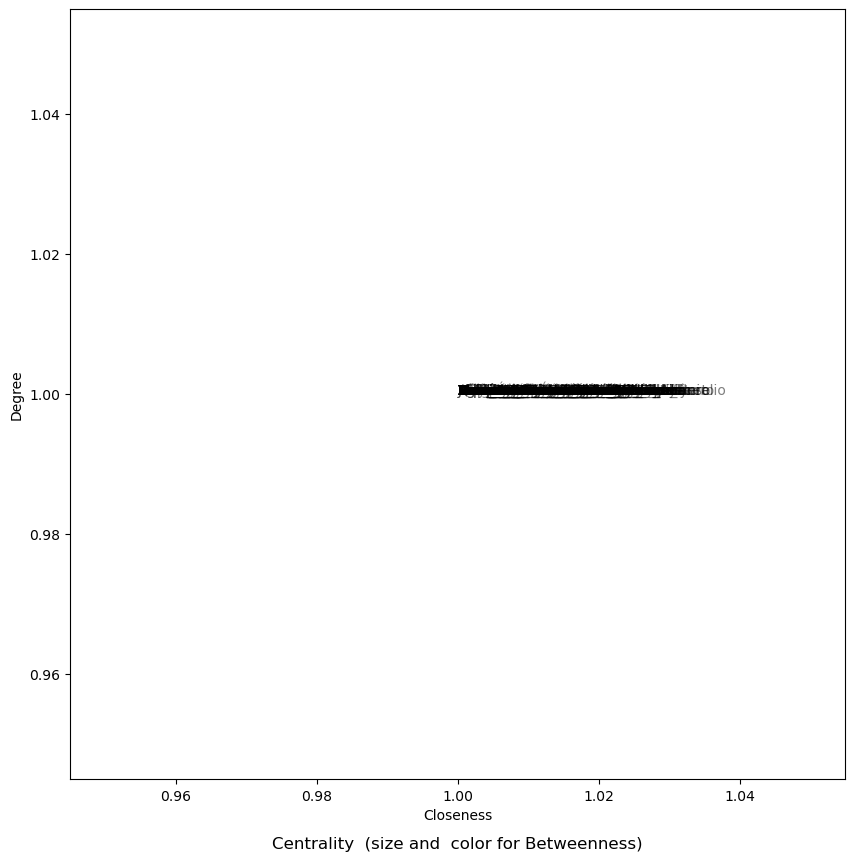

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(actorMeasures.Closeness, actorMeasures.Degree,s=1000*actorMeasures.Betweenness,
           c=100*actorMeasures.Betweenness,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(actorMeasures.index,actorMeasures.Closeness,actorMeasures.Degree)
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)
    
plt.title("Centrality  (size and  color for Betweenness)", y=-0.1)
plt.xlabel("Closeness")
plt.ylabel("Degree")
plt.show()

# Comentarios